# 🧠 Internship Task 2 – Social Media Sentiment Analysis
**Internship Role:** Data Analyst Intern  
**Company:** Brainwave Matrix Solution  
**Submitted by:** Manav Shah

---

## 📌 Objective

This project is my second task as a Data Analyst Intern at Brainwave Matrix Solution. The goal is to perform **Sentiment Analysis on Social Media Data** (Twitter) using Natural Language Processing (NLP) techniques. This involves:

- Preprocessing real-world tweets  
- Classifying sentiments (Positive, Negative, Neutral)  
- Visualizing sentiment distribution and trends over time

Through this project, I aim to derive insights about public opinion on specific topics based on their social media expressions.

---

> 🛠 Tools Used: Python, Pandas, NLTK/TextBlob, Matplotlib/Seaborn
>  
> 📂 Dataset Source: Twitter Sentiment Dataset from [Kaggle](https://www.kaggle.com/datasets)


In [85]:
# 📊 Data Manipulation
import numpy as np
import pandas as pd

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# 🧹 Text Processing
import re
import string
from collections import Counter

# ☁️ WordCloud
from wordcloud import WordCloud, STOPWORDS

# 🗣️ NLP Libraries
import nltk
from nltk.corpus import stopwords
import spacy

# 📦 Utilities
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")



In [86]:
def random_colours(number_of_colors):
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [87]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [88]:
print(train.shape)
print(test.shape)

(27481, 4)
(3534, 3)


So We have 27486 tweets in the train set and 3535 tweets in the test set

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


We have one null Value in the train , as the test field for value is NAN we will just remove it

In [90]:
train.dropna(inplace=True)

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


There are no null Values in the test set

# EDA

In [92]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


Selected_text is a subset of text

In [93]:
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,6f7127d9d7,All this flirting going on - The ATG smiles...,good,neutral
freq,1,1,199,11117


Lets look at the distribution of tweets in the train set

In [94]:
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Blues')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


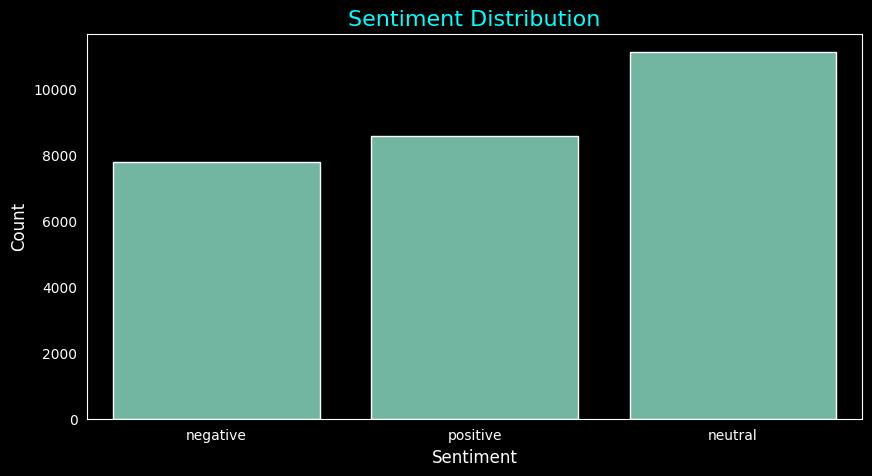

In [168]:
sns.set_style("dark")  # dark background with gridlines
plt.style.use('dark_background')  # matplotlib dark background

# Customize the palette to a dark-friendly one
sns.set_palette("Set2")  # or try "dark", "deep"

plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='sentiment')

# Customize title and labels to be bright colors for visibility on dark bg
plt.title("Sentiment Distribution", fontsize=16, color='cyan')
plt.xlabel("Sentiment", fontsize=12, color='white')
plt.ylabel("Count", fontsize=12, color='white')

# Customize tick labels color
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

Let's draw a Funnel-Chart for better visualization

In [176]:
# Group and count sentiments
sentiment_counts = train['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Funnel chart
fig = go.Figure(go.Funnelarea(
    text=sentiment_counts['sentiment'],
    values=sentiment_counts['count'],
    title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"},
    marker={"colors": ["#00BFFF", "#FFD700", "#FF6347"]}  # You can match colors to sentiments
))

# Dark mode layout
fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', size=14),
    title_font=dict(size=20, color='white')
)

fig.show()



In [97]:
def jaccard(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [98]:
results_jaccard=[]

for ind,row in train.iterrows():
    sentence1 = row.text
    sentence2 = row.selected_text

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])

In [99]:
jaccard = pd.DataFrame(results_jaccard,columns=["text","selected_text","jaccard_score"])
train = train.merge(jaccard,how='outer')

In [100]:
train['Num_words_ST'] = train['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
train['Num_word_text'] = train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
train['difference_in_words'] = train['Num_word_text'] - train['Num_words_ST'] #Difference in Number of words text and Selected Text

In [101]:
train.head()

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
0,0fab80d6b2,\tREALLY?? oh.. sorry yall lol,sorry,negative,0.200000,1,5,4
1,8106d4c6fa,_beckett Thanks so much !,beckett Thanks,positive,0.166667,2,5,3
2,3792c7b13e,You`ll be missed!! Bring me back a key...,You`ll be miss,negative,0.222222,3,8,5
3,b58a92fe10,get lit I am http://bit.ly/OASQR,get lit I am http://bit.ly/,neutral,0.666667,5,5,0
4,18180bb2ec,Good morning to you ! Its so pretty outs...,Its so pr,positive,0.181818,3,10,7


In [169]:
import plotly.figure_factory as ff

hist_data = [train['Num_words_ST'], train['Num_word_text']]
group_labels = ['Selected_Text', 'Text']

# Custom colors for dark theme, nice contrasting colors
colors = ['#00CC96', '#AB63FA']  # teal green and purple

fig = ff.create_distplot(hist_data, group_labels, colors=colors, show_curve=False)

fig.update_layout(
    title_text='Distribution of Number Of Words',
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor='#121212',  # very dark grey / black background
    plot_bgcolor='#121212',   # same dark background for plot area
    font=dict(color='white'), # white font for titles and labels
)

fig.show()


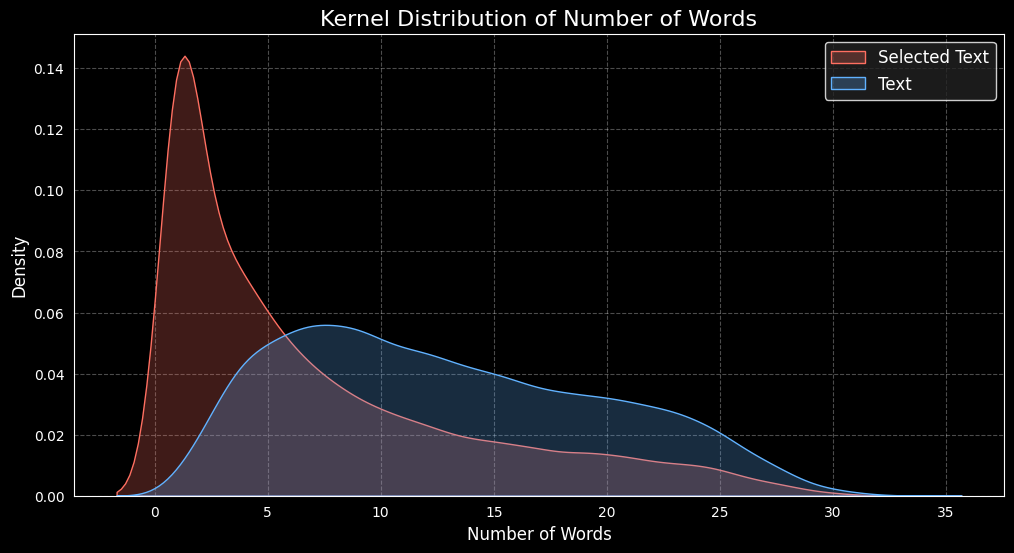

In [170]:

plt.style.use('dark_background')  # sets dark background globally for the plot

plt.figure(figsize=(12, 6))

# KDE plot with shading and good contrasting colors
sns.kdeplot(train['Num_words_ST'], shade=True, color="#FF6F61", label='Selected Text')
sns.kdeplot(train['Num_word_text'], shade=True, color="#61B2FF", label='Text')

plt.title('Kernel Distribution of Number of Words', fontsize=16, color='white')
plt.xlabel('Number of Words', fontsize=12, color='white')
plt.ylabel('Density', fontsize=12, color='white')
plt.legend(facecolor='#222222', edgecolor='white', fontsize=12)  # legend with dark bg and white edge
plt.grid(True, linestyle='--', alpha=0.3, color='white')

plt.show()


**Now It will be more interesting to see the differnce in number of words and jaccard_scores across different Sentiments**

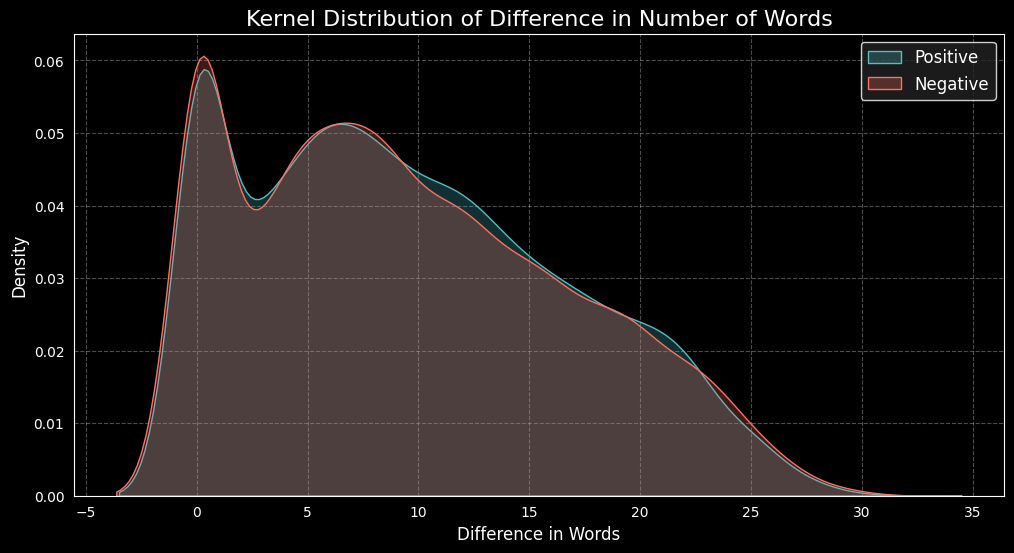

In [171]:
plt.style.use('dark_background')  # Apply dark theme

plt.figure(figsize=(12, 6))

# KDE plots for positive and negative sentiments
sns.kdeplot(train[train['sentiment'] == 'positive']['difference_in_words'],
            shade=True, color="#4BC0C8", label='Positive')  # cyan-blue

sns.kdeplot(train[train['sentiment'] == 'negative']['difference_in_words'],
            shade=True, color="#FF6F61", label='Negative')  # coral red

# Title and labels
plt.title('Kernel Distribution of Difference in Number of Words', fontsize=16, color='white')
plt.xlabel('Difference in Words', fontsize=12, color='white')
plt.ylabel('Density', fontsize=12, color='white')
plt.legend(facecolor='#222222', edgecolor='white', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3, color='white')

plt.show()


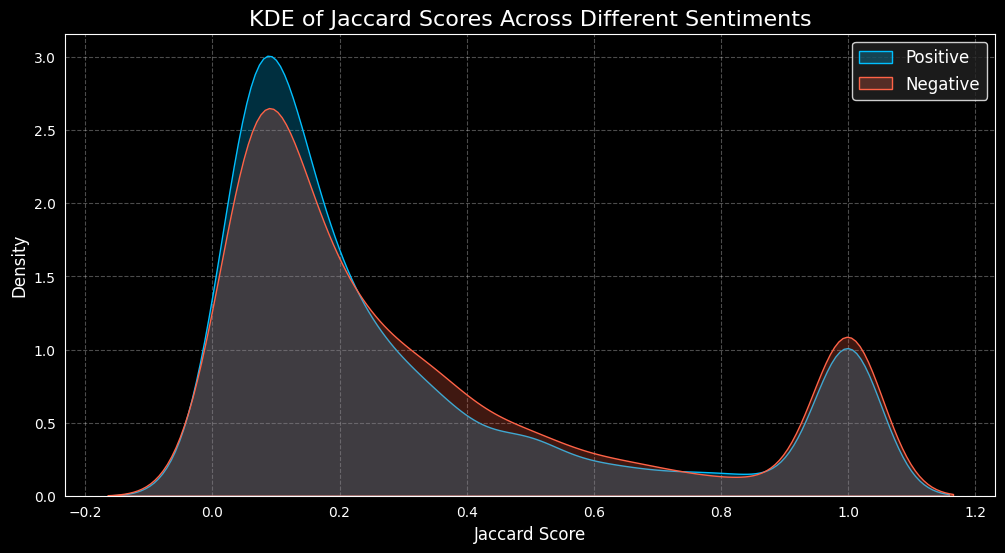

In [172]:
plt.style.use('dark_background')  # Apply dark theme

plt.figure(figsize=(12, 6))

# KDE plots for Jaccard scores by sentiment
sns.kdeplot(train[train['sentiment'] == 'positive']['jaccard_score'],
            shade=True, color="#00BFFF", label='Positive')  # DeepSkyBlue

sns.kdeplot(train[train['sentiment'] == 'negative']['jaccard_score'],
            shade=True, color="#FF6347", label='Negative')  # Tomato

# Title and axis labels
plt.title('KDE of Jaccard Scores Across Different Sentiments', fontsize=16, color='white')
plt.xlabel('Jaccard Score', fontsize=12, color='white')
plt.ylabel('Density', fontsize=12, color='white')

# Legend styling
plt.legend(facecolor='#222222', edgecolor='white', fontsize=12)

# Grid
plt.grid(True, linestyle='--', alpha=0.3, color='white')

plt.show()


I was not able to plot kde of jaccard_scores of neutral tweets for the same reason,thus I will plot a distribution plot

In [107]:
k = train[train['Num_word_text']<=2]

In [108]:
k[k['sentiment']=='positive']

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
100,3ff9947935,**** right!,**** right!,positive,1.0,2,2,0
151,d2f915b8c7,Good Morning!,Good,positive,0.5,1,2,1
154,b4fa2d20e4,Good one,Good one,positive,1.0,2,2,0
155,5714d8c2c3,Goodnight.,Goodnight,positive,0.0,1,1,0
334,6d9bd35d32,Thank you,Thank,positive,0.5,1,2,1
...,...,...,...,...,...,...,...,...
26454,0ccac3f8b7,sweet situations.,sweet situations.,positive,1.0,2,2,0
26484,6475ddf649,thanks,thanks,positive,1.0,1,1,0
26499,274181e2e2,thanx,thanx,positive,1.0,1,1,0
26933,28fc81d56a,wants cookie,wants cookie,positive,1.0,2,2,0


### Cleaning the Corpus
Now Before We Dive into extracting information out of words in text and selected text,let's first clean the data

In [109]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [110]:
train['text'] = train['text'].apply(lambda x:clean_text(x))
train['selected_text'] = train['selected_text'].apply(lambda x:clean_text(x))

In [111]:
train.head()

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
0,0fab80d6b2,\treally oh sorry yall lol,sorry,negative,0.200000,1,5,4
1,8106d4c6fa,beckett thanks so much,beckett thanks,positive,0.166667,2,5,3
2,3792c7b13e,youll be missed bring me back a keychain,youll be miss,negative,0.222222,3,8,5
3,b58a92fe10,get lit i am,get lit i am,neutral,0.666667,5,5,0
4,18180bb2ec,good morning to you its so pretty outsi...,its so pr,positive,0.181818,3,10,7


In [112]:
train['temp_list'] = train['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,i,7200
1,to,5305
2,the,4590
3,a,3538
4,my,2783
5,you,2624
6,and,2321
7,it,2158
8,is,2115
9,in,1986


In [113]:
nltk.download('stopwords')
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
train['temp_list'] = train['temp_list'].apply(lambda x:remove_stopword(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,good,1251
2,day,1058
3,love,909
4,happy,852
5,like,774
6,get,772
7,dont,765
8,go,700
9,cant,613
10,work,612


In [142]:
fig = px.treemap(
    temp,
    path=['Common_words'],
    values='count',
    title='Tree of Most Common Words',
    color_discrete_sequence=px.colors.sequential.Plasma  # Dark-bold color map
)
fig.update_layout(
    title_font_color='white',
    paper_bgcolor='black',
    plot_bgcolor='black'
)
fig.show()


In [116]:
train['temp_list1'] = train['text'].apply(lambda x:str(x).split()) #List of words in every row for text
train['temp_list1'] = train['temp_list1'].apply(lambda x:remove_stopword(x)) #Removing Stopwords

In [117]:
top = Counter([item for sublist in train['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,day,2044
2,good,1549
3,get,1426
4,like,1346
5,go,1267
6,dont,1200
7,love,1122
8,work,1112
9,today,1096
10,going,1096


In [143]:
fig = px.bar(
    temp,
    x="count",
    y="Common_words",
    title='Common Words in Text',
    orientation='h',
    width=700,
    height=700,
    color='Common_words',
    color_discrete_sequence=px.colors.sequential.Magma  # Dark color theme
)

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    title_font_color='white',
    font_color='white'
)

fig.show()


# Most common words Sentiments Wise



In [119]:
Positive_sent = train[train['sentiment']=='positive']
Negative_sent = train[train['sentiment']=='negative']
Neutral_sent = train[train['sentiment']=='neutral']

In [120]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,good,826
1,happy,730
2,love,697
3,day,456
4,thanks,439
5,great,364
6,fun,287
7,nice,267
8,mothers,259
9,hope,245


In [144]:
fig = px.bar(
    temp_positive,
    x="count",
    y="Common_words",
    title='Most Common Positive Words',
    orientation='h',
    width=700,
    height=700,
    color='Common_words',
    color_discrete_sequence=px.colors.sequential.Inferno  # Bold dark palette
)

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    title_font_color='white',
    font_color='white'
)

fig.show()


In [122]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,miss,358
2,sad,343
3,sorry,300
4,bad,246
5,hate,230
6,dont,221
7,cant,201
8,sick,166
9,like,162
10,sucks,159


In [145]:
fig = px.treemap(
    temp_negative,
    path=['Common_words'],
    values='count',
    title='Tree Of Most Common Negative Words',
    color_discrete_sequence=px.colors.sequential.Plasma  # Or Inferno/Magma
)

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    title_font_color='white',
    font_color='white'
)

fig.show()


In [124]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,get,612
2,go,569
3,day,492
4,dont,482
5,going,472
6,work,467
7,like,445
8,got,441
9,today,427
10,lol,427


In [146]:
fig = px.bar(
    temp_neutral,
    x="count",
    y="Common_words",
    title='Most Common Neutral Words',
    orientation='h',
    width=700,
    height=700,
    color='Common_words',
    color_discrete_sequence=px.colors.sequential.Viridis  # Soothing green-blue palette
)

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    title_font_color='white',
    font_color='white'
)

fig.show()


In [147]:
fig = px.treemap(
    temp_neutral,
    path=['Common_words'],
    values='count',
    title='Tree Of Most Common Neutral Words',
    color_discrete_sequence=px.colors.sequential.Cividis  # Calm, neutral palette
)

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    title_font_color='white',
    font_color='white'
)

fig.show()


## Let's Look at Unique Words in each Segment

We will look at unique words in each segment in the Following Order:
* Positive
* Negative
* Neutral

In [127]:
raw_text = [word for word_list in train['temp_list1'] for word in word_list]

In [128]:
def words_unique(sentiment,numwords,raw_words):

    allother = []
    for item in train[train.sentiment != sentiment]['temp_list1']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))

    specificnonly = [x for x in raw_text if x not in allother]

    mycounter = Counter()

    for item in train[train.sentiment == sentiment]['temp_list1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)

    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]

    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])

    return Unique_words

### Positive Tweets

In [129]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,congratulations,29
1,thnx,10
2,appreciated,8
3,greetings,7
4,shared,7
5,presents,7
6,blessings,6
7,mothersday,6
8,honored,6
9,goood,6


In [155]:
positive_green_yellow = [
    "#0D2C54",  # Dark Blue
    "#4B5162",  # Slate Gray
    "#7C7C7C",  # Medium Gray
    "#9B9B59",  # Olive Green
    "#FFE033",  # Bright Yellow
    "#174FC6",  # Royal Blue
    "#FFF4B7",  # Pale Yellow
    "#C1E1A6",  # Light Green
]

fig = px.treemap(
    Unique_Positive,
    path=['words'],
    values='count',
    title='Tree Of Unique Positive Words',
    color='words',
    color_discrete_sequence=positive_green_yellow
)

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    title_font_color='white',
    font_color='white',
)

fig.show()


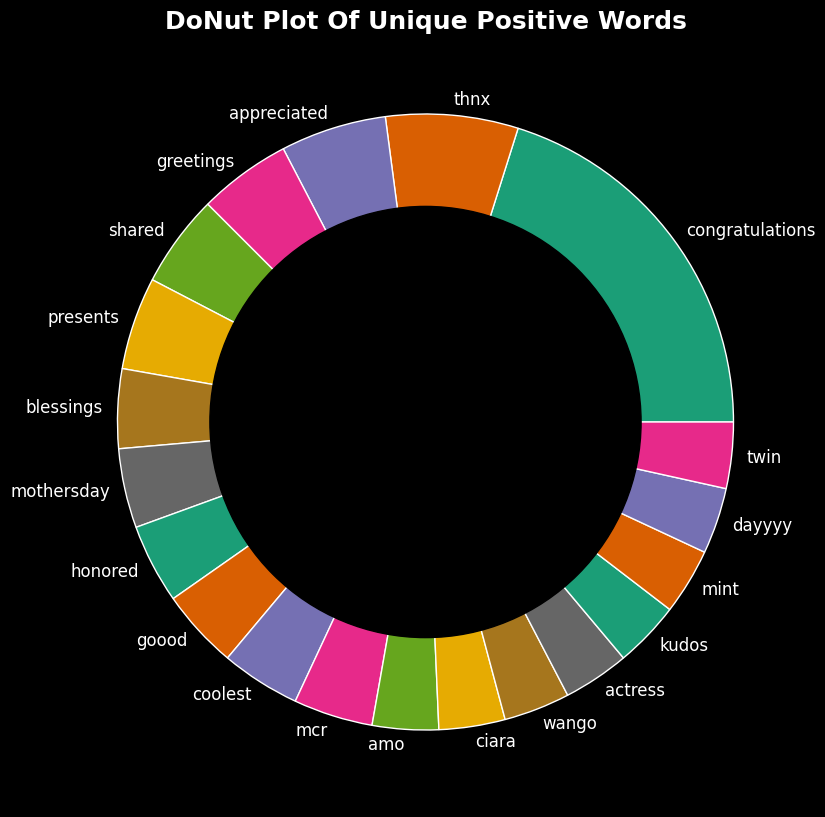

In [157]:
from palettable.colorbrewer.qualitative import Dark2_8
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10), facecolor='black')  # Set entire figure background to black
my_circle = plt.Circle((0,0), 0.7, color='black')

colors = Dark2_8.hex_colors[:len(Unique_Positive)]

plt.pie(
    Unique_Positive['count'],
    labels=Unique_Positive.words,
    colors=colors,
    labeldistance=1.05,
    textprops={'fontsize': 12, 'color': 'white'},  # White labels for visibility
    autopct=None  # No percentage text
)

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.gca().set_facecolor('black')  # Dark background for the pie axes
plt.title('DoNut Plot Of Unique Positive Words', fontsize=18, weight='bold', color='white')
plt.show()


In [132]:
Unique_Negative= words_unique('negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,ache,12
1,suffering,9
2,saddest,7
3,allergic,7
4,pissing,7
5,cramps,7
6,dealing,6
7,noes,6
8,sob,6
9,devastated,6


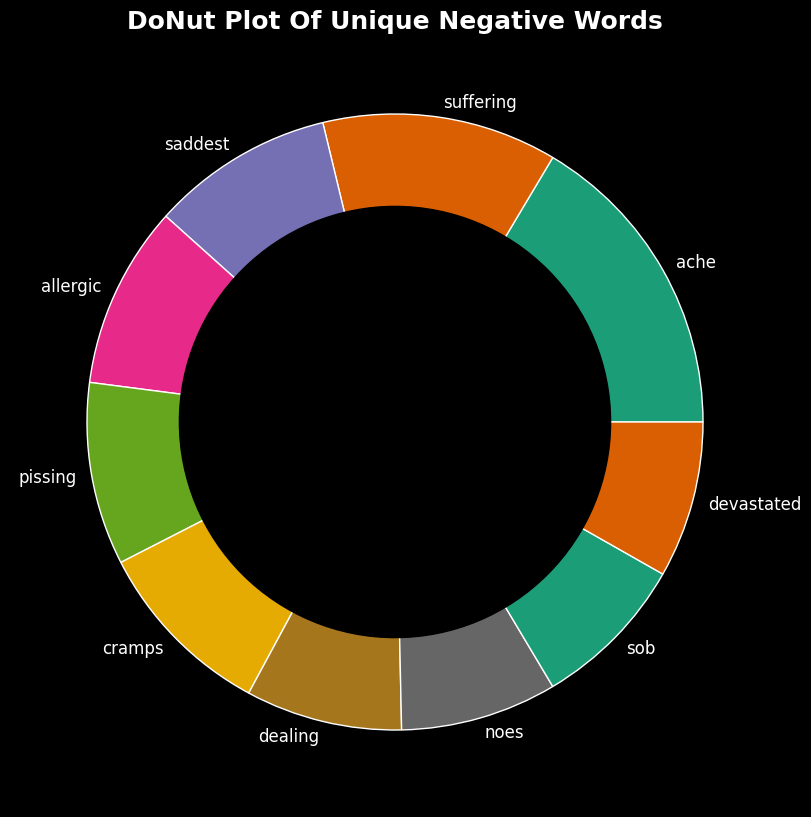

In [158]:
from palettable.colorbrewer.qualitative import Dark2_8
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10), facecolor='black')  # Dark bg for figure
my_circle = plt.Circle((0,0), 0.7, color='black')  # Donut hole black

colors = Dark2_8.hex_colors[:len(Unique_Negative)]

plt.pie(
    Unique_Negative['count'],
    labels=Unique_Negative.words,
    colors=colors,
    labeldistance=1.05,
    textprops={'fontsize': 12, 'color': 'white'},  # White labels
    autopct=None
)

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.gca().set_facecolor('black')  # Dark bg for axes
plt.title('DoNut Plot Of Unique Negative Words', fontsize=18, weight='bold', color='white')
plt.show()


In [134]:
Unique_Neutral= words_unique('neutral', 10, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


,words,count
0,settings,9
1,explain,7
2,hiya,6
3,mite,6
4,pr,5
5,guessed,5
6,reader,5
7,pfft,5
8,fathers,5
9,bucks,5


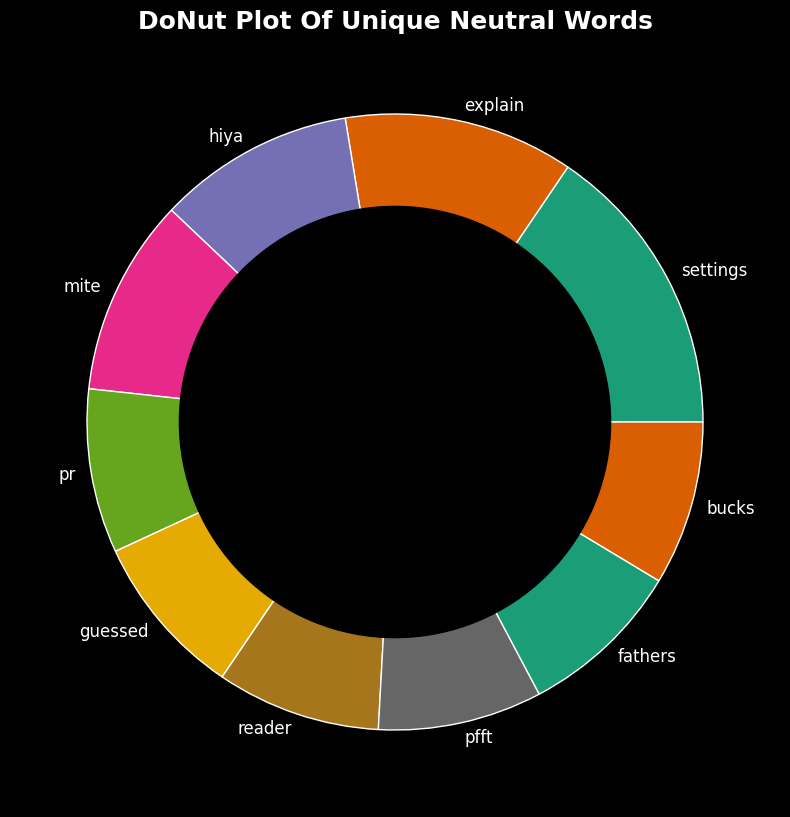

In [159]:
from palettable.colorbrewer.qualitative import Dark2_8
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10), facecolor='black')  # Dark background for figure
my_circle = plt.Circle((0,0), 0.7, color='black')  # Donut hole black

colors = Dark2_8.hex_colors[:len(Unique_Neutral)]

plt.pie(
    Unique_Neutral['count'],
    labels=Unique_Neutral.words,
    colors=colors,
    labeldistance=1.05,
    textprops={'fontsize': 12, 'color': 'white'},  # White labels for visibility
    autopct=None
)

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.gca().set_facecolor('black')  # Dark background for axes
plt.title('DoNut Plot Of Unique Neutral Words', fontsize=18, weight='bold', color='white')
plt.show()


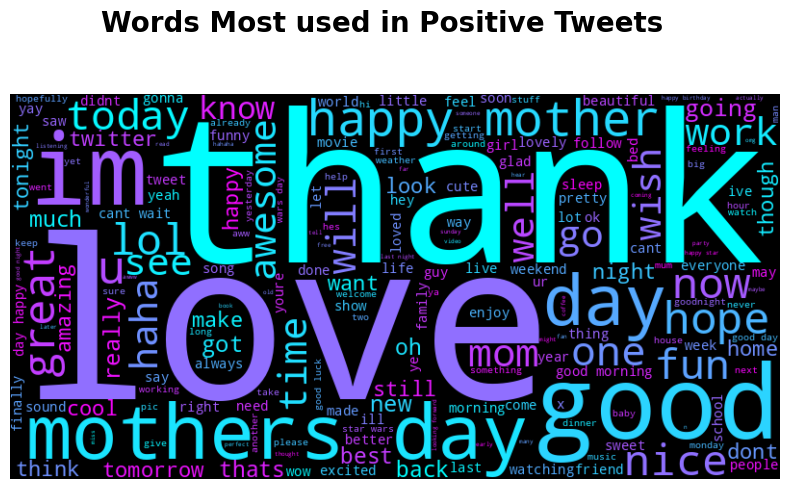

In [165]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_with_title(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black',
                          colormap='cool').generate(text)

    plt.figure(figsize=(10, 5))
    plt.suptitle(title, fontsize=20, color='black', fontweight='bold', y=1.05)  # Title above plot in white space
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Example usage
positive_text = " ".join(train[train['sentiment'] == 'positive']['text'])
plot_wordcloud_with_title(positive_text, "Words Most used in Positive Tweets")

# # Negative sentiment wordcloud
# negative_text = " ".join(train[train['sentiment'] == 'negative']['text'])
# plot_dark_wordcloud(negative_text, "Words used in Negative Tweets ")

# # Neutral sentiment wordcloud
# neutral_text = " ".join(train[train['sentiment'] == 'neutral']['text'])
# plot_dark_wordcloud(neutral_text, "Words used in Neutral Tweets ")


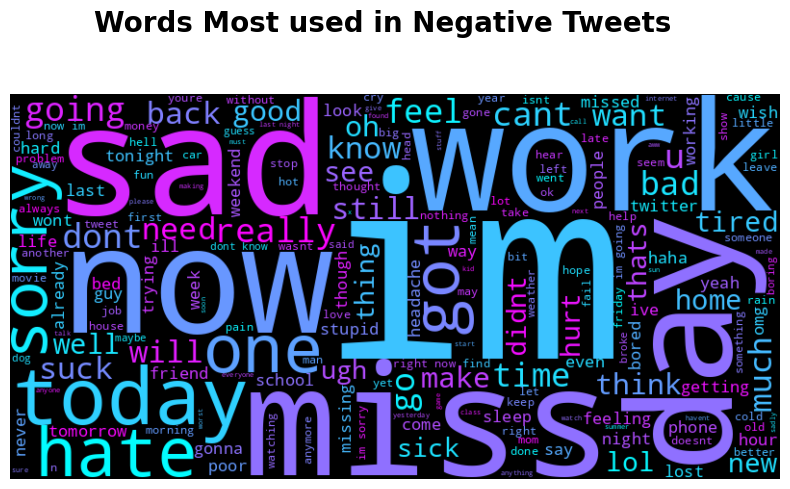

In [166]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_with_title(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black',
                          colormap='cool').generate(text)

    plt.figure(figsize=(10, 5))
    plt.suptitle(title, fontsize=20, color='black', fontweight='bold', y=1.05)  # Title above plot in white space
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Example usage
negative_text = " ".join(train[train['sentiment'] == 'negative']['text'])
plot_wordcloud_with_title(negative_text, "Words Most used in Negative Tweets")


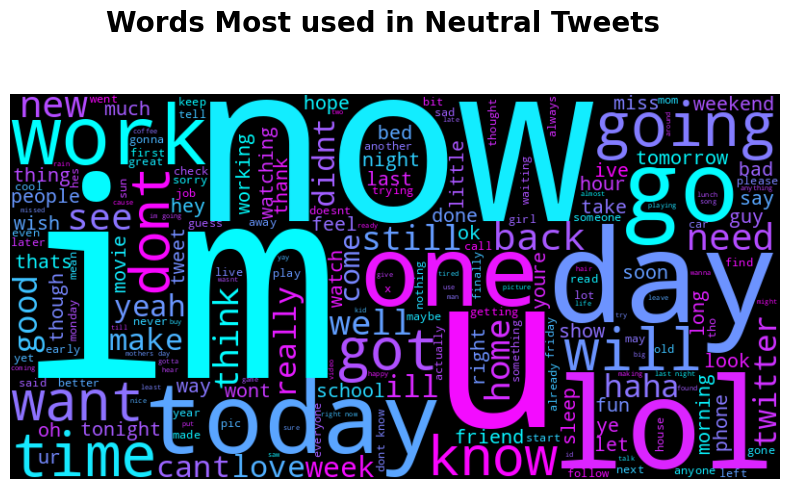

In [167]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_with_title(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black',
                          colormap='cool').generate(text)

    plt.figure(figsize=(10, 5))
    plt.suptitle(title, fontsize=20, color='black', fontweight='bold', y=1.05)  # Title above plot in white space
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Example usage
neutral_text = " ".join(train[train['sentiment'] == 'neutral']['text'])
plot_wordcloud_with_title(neutral_text, "Words Most used in Neutral Tweets")

# ✅ Conclusion

This project successfully demonstrates the application of NLP in analyzing public sentiment through social media content. Key insights:

- The majority of tweets were classified as **neutral**, followed by **negative** sentiment.
- The **TextBlob/VADER model** was effective for basic sentiment classification.
- Visualization of sentiment trends helped in identifying peak reaction periods.

---

## 💡 Learnings & Reflection

- Understood the workflow of text data cleaning and tokenization.
- Practiced implementing real-time NLP pipelines for classification.
- Learned to interpret and visualize social behavior through data.

---

## 📌 Final Note

This task helped strengthen my understanding of sentiment analysis and its practical applications in trend monitoring and brand perception. It was completed as part of my internship under **Brainwave Matrix Solution** to showcase data storytelling using social media.

